In [ ]:
!pip install -r '/tf/requirements.txt'

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import regularizers
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=r"Your `PyDataset` class should call `super().__init__\(\*\*kwargs\)`")

In [23]:


# importing pretrained models 
# importing pretrained models 
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception



In [3]:
data_dir = 'data/input/butterflies/'
train_dir = 'data/input/butterflies/train'
test_dir = 'data/input/butterflies/test'

In [4]:
train_df = pd.read_csv(f'{data_dir}Training_set.csv')
test_df = pd.read_csv(f'{data_dir}Testing_set.csv')

In [ ]:
train_df.head(10)

/tmp/ipykernel_11652/3005860966.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')


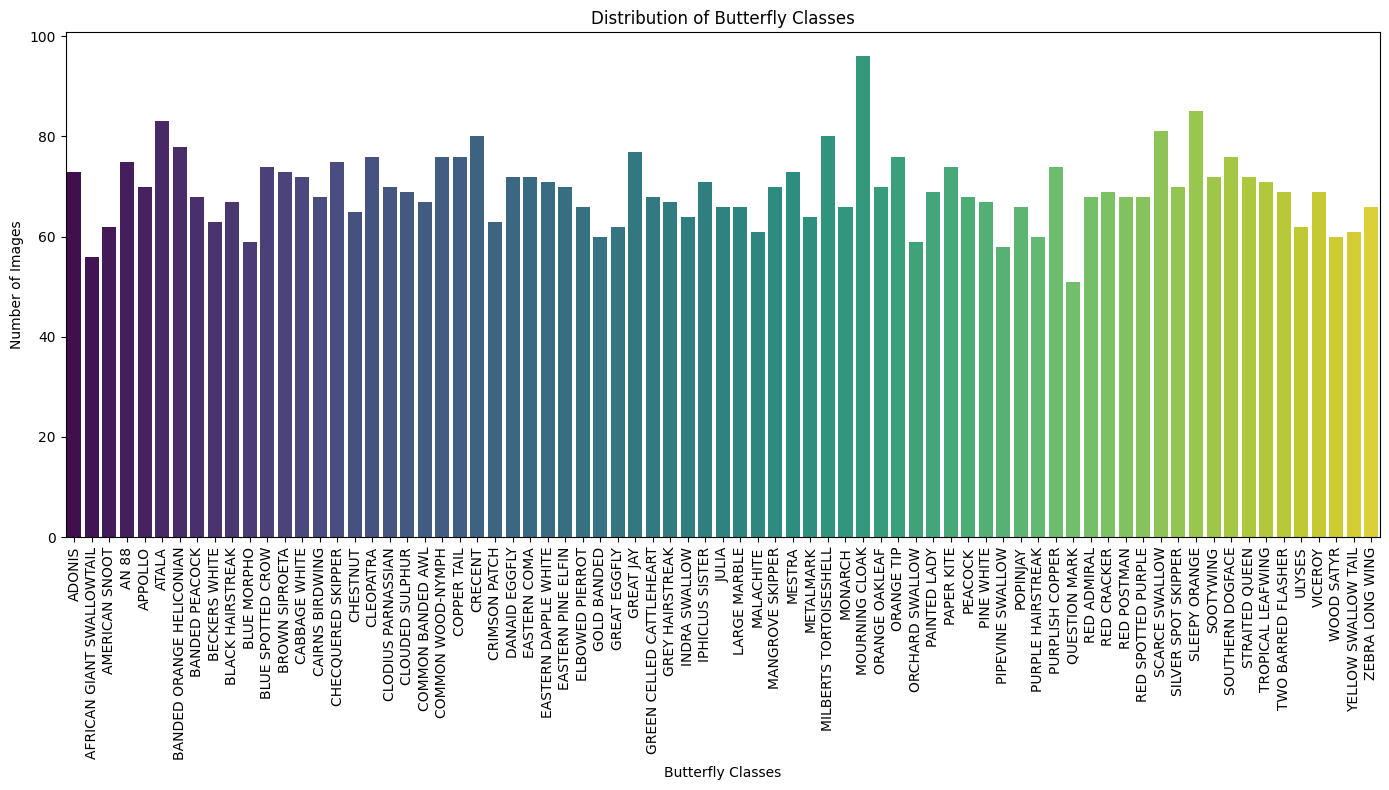

In [15]:
class_counts = train_df['label'].value_counts().sort_index()
class_counts_percent = train_df['label'].value_counts(normalize=True)*100


plt.figure(figsize=(14, 8))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='viridis')
plt.title('Distribution of Butterfly Classes')
plt.xlabel('Butterfly Classes')
plt.ylabel('Number of Images')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



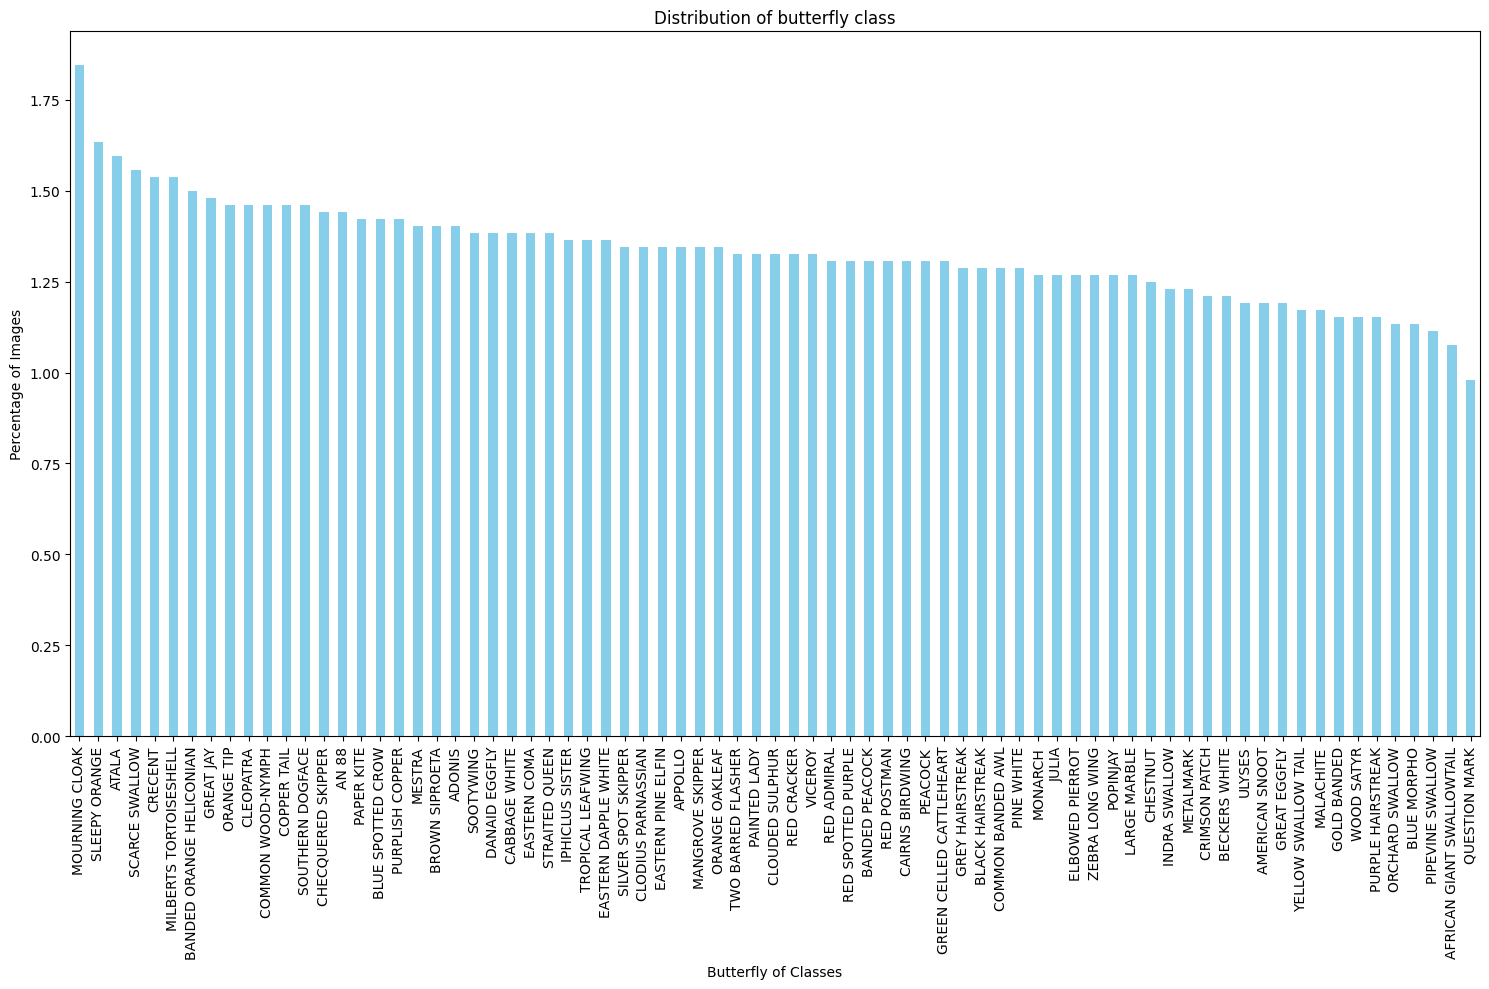

In [17]:
fig2 = plt.figure(figsize = (15,10))
class_counts_percent.plot(kind='bar', color='skyblue')
plt.title("Distribution of butterfly class")
plt.xlabel("Butterfly of Classes")
plt.ylabel("Percentage of Images")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

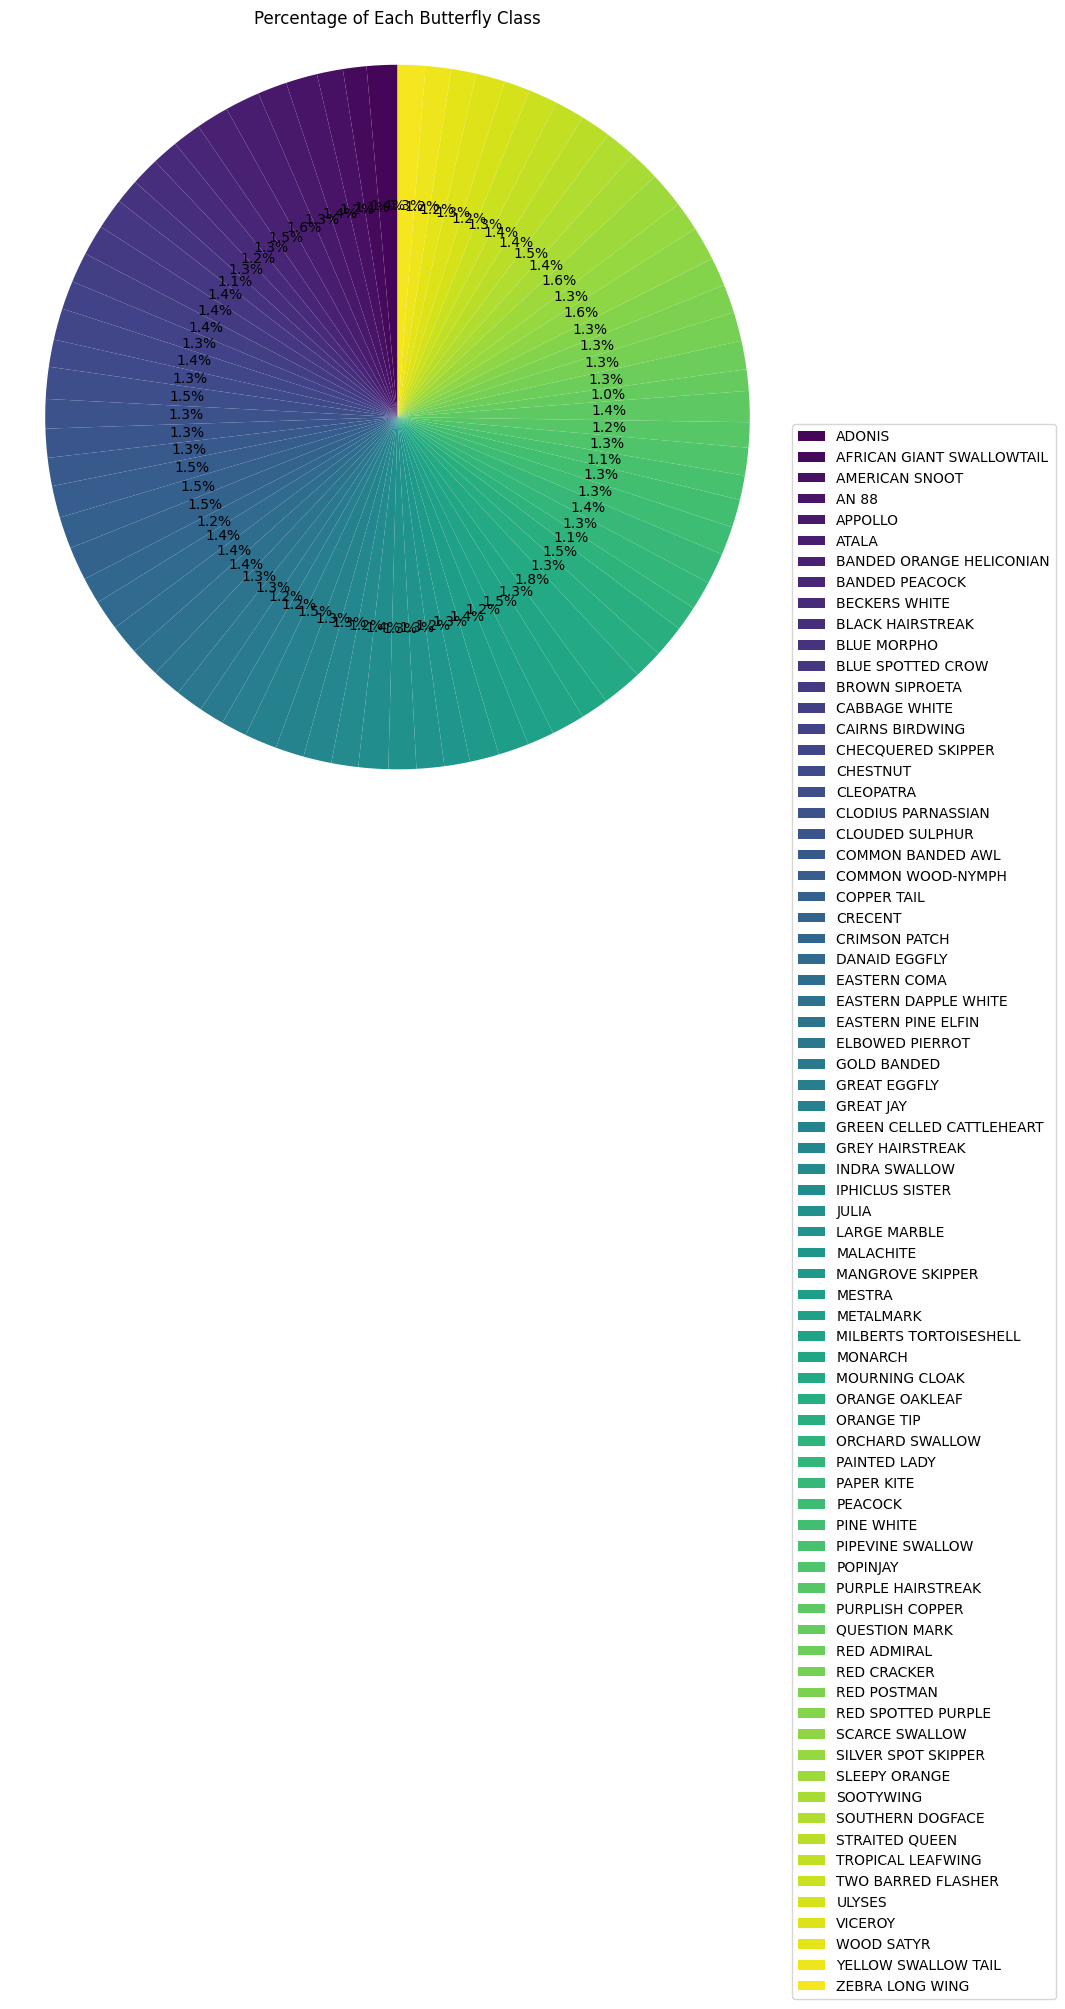

In [21]:
colors = sns.color_palette("viridis", len(class_counts))
class_counts = train_df['label'].value_counts().sort_index()


plt.figure(figsize=(10, 10))
plt.pie(class_counts.values, labels=None, autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Each Butterfly Class')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(class_counts.index, loc="best", bbox_to_anchor=(1, 0.5))
plt.show()

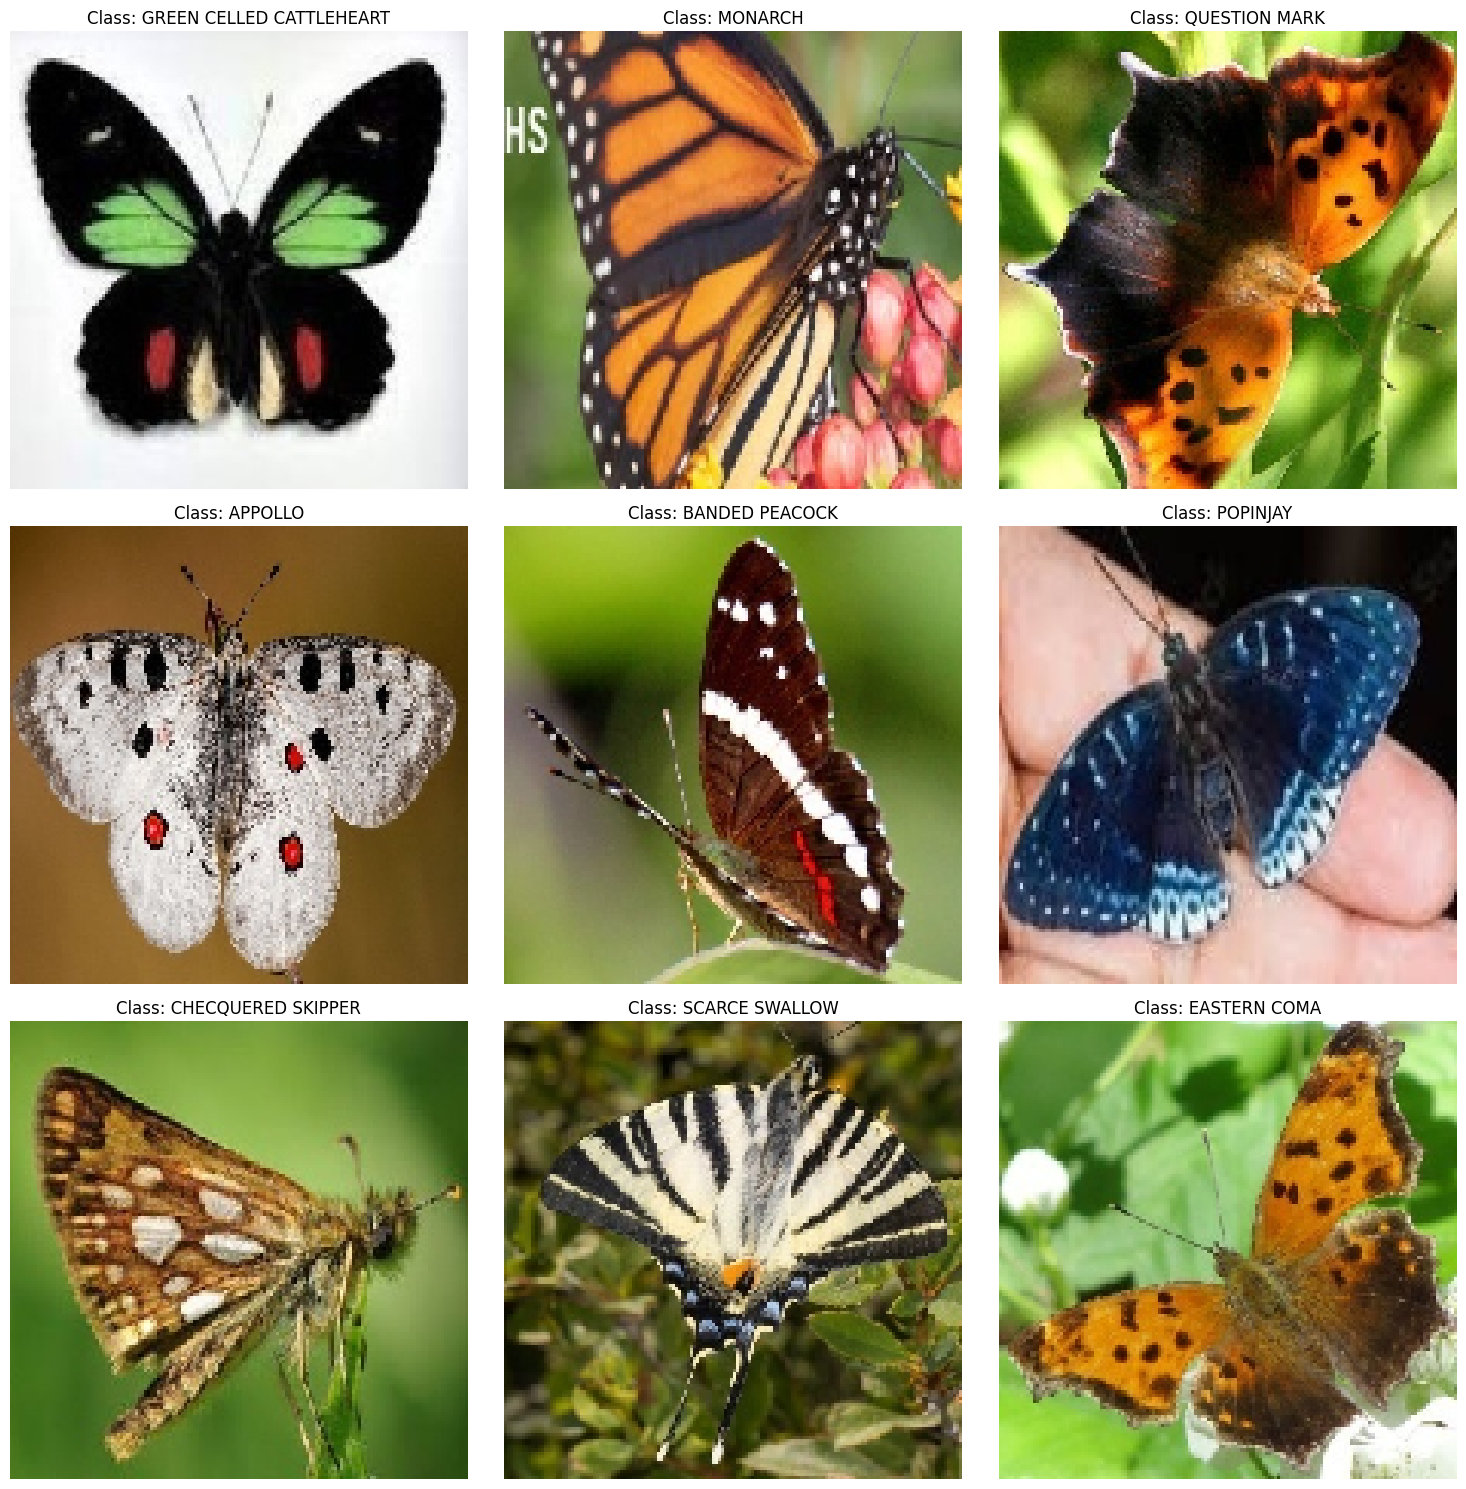

In [7]:
sample_images = train_df.sample(9, random_state=42)

fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for i, (index, row) in enumerate(sample_images.iterrows()):
    img_path = os.path.join(train_dir, row['filename'])
    img = load_img(img_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0  # Normalize the image
    
    ax = axes[i // 3, i % 3]
    ax.imshow(img_array)
    ax.set_title(f"Class: {row['label']}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory=train_dir,
    x_col='filename',
    y_col='label',
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory=train_dir,
    x_col='filename',
    y_col='label',
    target_size=(180, 180),
    batch_size=32,
    class_mode='categorical'
)

In [43]:
train_generator

In [ ]:
model_CNN = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(75, activation='softmax')
])

model_CNN.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model_CNN.summary()

In [10]:
history = model_CNN.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=40,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 101s 613ms/step - accuracy: 0.0514 - loss: 4.1232 - val_accuracy: 0.2070 - val_loss: 2.9989
Epoch 2/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 460us/step - accuracy: 0.1250 - loss: 3.1566 - val_accuracy: 0.1500 - val_loss: 3.1580
Epoch 3/40


2024-10-19 16:43:38.450177: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/usr/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-10-19 16:43:38.513412: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


162/162 ━━━━━━━━━━━━━━━━━━━━ 98s 604ms/step - accuracy: 0.2170 - loss: 2.9848 - val_accuracy: 0.3398 - val_loss: 2.4146
Epoch 4/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 373us/step - accuracy: 0.3750 - loss: 2.2929 - val_accuracy: 0.2000 - val_loss: 3.0903
Epoch 5/40


2024-10-19 16:45:17.023791: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


162/162 ━━━━━━━━━━━━━━━━━━━━ 95s 588ms/step - accuracy: 0.3394 - loss: 2.3928 - val_accuracy: 0.4414 - val_loss: 2.0578
Epoch 6/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 403us/step - accuracy: 0.2812 - loss: 2.5328 - val_accuracy: 0.3500 - val_loss: 2.5197
Epoch 7/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 96s 589ms/step - accuracy: 0.4113 - loss: 2.0733 - val_accuracy: 0.5070 - val_loss: 1.6927
Epoch 8/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 540us/step - accuracy: 0.5625 - loss: 1.6332 - val_accuracy: 0.5000 - val_loss: 2.0040
Epoch 9/40


2024-10-19 16:48:29.152906: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


162/162 ━━━━━━━━━━━━━━━━━━━━ 94s 578ms/step - accuracy: 0.4928 - loss: 1.7618 - val_accuracy: 0.5141 - val_loss: 1.6951
Epoch 10/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 365us/step - accuracy: 0.4688 - loss: 1.8591 - val_accuracy: 0.4500 - val_loss: 1.6855
Epoch 11/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 96s 595ms/step - accuracy: 0.5243 - loss: 1.6584 - val_accuracy: 0.5641 - val_loss: 1.4996
Epoch 12/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 414us/step - accuracy: 0.6250 - loss: 1.3112 - val_accuracy: 0.6500 - val_loss: 1.8278
Epoch 13/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 97s 601ms/step - accuracy: 0.5827 - loss: 1.4324 - val_accuracy: 0.6211 - val_loss: 1.3181
Epoch 14/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 371us/step - accuracy: 0.6250 - loss: 1.2193 - val_accuracy: 0.5500 - val_loss: 1.7246
Epoch 15/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 96s 594ms/step - accuracy: 0.5832 - loss: 1.3813 - val_accuracy: 0.6172 - val_loss: 1.3484
Epoch 16/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 371us/step - accuracy: 0.6562 - loss: 1.1899 - 

2024-10-19 16:54:55.284638: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


162/162 ━━━━━━━━━━━━━━━━━━━━ 100s 615ms/step - accuracy: 0.6510 - loss: 1.2236 - val_accuracy: 0.6453 - val_loss: 1.2296
Epoch 18/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.5625 - loss: 1.3632 - val_accuracy: 0.7500 - val_loss: 1.0186
Epoch 19/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 97s 595ms/step - accuracy: 0.6434 - loss: 1.1763 - val_accuracy: 0.6586 - val_loss: 1.2350
Epoch 20/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 369us/step - accuracy: 0.6875 - loss: 1.3218 - val_accuracy: 0.8000 - val_loss: 0.9296
Epoch 21/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 96s 591ms/step - accuracy: 0.6727 - loss: 1.0972 - val_accuracy: 0.6367 - val_loss: 1.2591
Epoch 22/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 367us/step - accuracy: 0.5938 - loss: 1.0368 - val_accuracy: 0.5500 - val_loss: 1.8152
Epoch 23/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 96s 589ms/step - accuracy: 0.6895 - loss: 1.0552 - val_accuracy: 0.6781 - val_loss: 1.2022
Epoch 24/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 371us/step - accuracy: 0.6250 - loss: 1.1814 -

2024-10-19 17:07:52.848775: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


162/162 ━━━━━━━━━━━━━━━━━━━━ 98s 606ms/step - accuracy: 0.7376 - loss: 0.8592 - val_accuracy: 0.6992 - val_loss: 1.1140
Epoch 34/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 386us/step - accuracy: 0.5000 - loss: 1.2446 - val_accuracy: 0.6500 - val_loss: 0.9448
Epoch 35/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 97s 596ms/step - accuracy: 0.7720 - loss: 0.7473 - val_accuracy: 0.6773 - val_loss: 1.1920
Epoch 36/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 377us/step - accuracy: 0.7500 - loss: 0.7767 - val_accuracy: 0.7500 - val_loss: 1.2865
Epoch 37/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 96s 589ms/step - accuracy: 0.7496 - loss: 0.7976 - val_accuracy: 0.6984 - val_loss: 1.1124
Epoch 38/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 361us/step - accuracy: 0.6875 - loss: 0.7308 - val_accuracy: 0.7500 - val_loss: 0.5260
Epoch 39/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 96s 590ms/step - accuracy: 0.7680 - loss: 0.7397 - val_accuracy: 0.7195 - val_loss: 1.0564
Epoch 40/40
162/162 ━━━━━━━━━━━━━━━━━━━━ 1s 367us/step - accuracy: 0.8125 - loss: 0.4075 - 

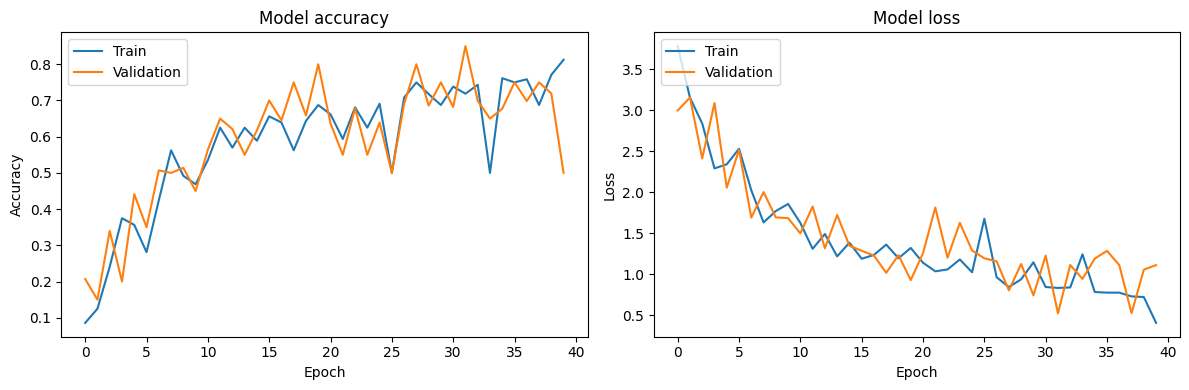

In [11]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [ ]:
val_images, val_labels = next(val_generator)

pred_labels = model_CNN.predict(val_images)
pred_labels = np.argmax(pred_labels, axis=1)
true_labels = np.argmax(val_labels, axis=1)

class_indices = val_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}

def display_images(images, true_labels, pred_labels, class_names, num_images=9):
    plt.figure(figsize=(15, 15))
    for i in range(num_images):
        plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        true_label = class_names[int(true_labels[i])]
        pred_label = class_names[int(pred_labels[i])]
        plt.title(f"True: {true_label}\nPred: {pred_label}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_images(val_images, true_labels, pred_labels, class_names, num_images=9)

In [63]:
#Inception Model
#Generators
#train_generator, val_generator

base_model = InceptionV3(weights='imagenet',
    include_top=False,
    input_shape=(180, 180, 3))

In [64]:
# Freeze the layers except the last few layers
for layer in base_model.layers[:-18]:
    layer.trainable = False

In [67]:


model = Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(75, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.00005), 
    metrics=['accuracy']
)

model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ inception_v3 (Functional)       │ (None, 4, 4, 2048)     │    21,802,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 75)             │        19,275 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,049,515 (99.37 MB)

 Trainable params: 5,297,355 (20.21 MB)

 Non-trainable params: 20,752,160 (79.16 MB)

In [ ]:
fine_tune_inception1_2 = model.fit(
    train_generator,
    epochs=40,
    validation_data=val_generator,
    )

Epoch 1/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 62s 599ms/step - accuracy: 0.3952 - loss: 2.4705 - val_accuracy: 0.5644 - val_loss: 1.7850
Epoch 2/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 63s 602ms/step - accuracy: 0.4946 - loss: 2.0231 - val_accuracy: 0.6529 - val_loss: 1.4440
Epoch 3/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 62s 600ms/step - accuracy: 0.5639 - loss: 1.7057 - val_accuracy: 0.7096 - val_loss: 1.1787
Epoch 4/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 65s 621ms/step - accuracy: 0.6446 - loss: 1.3865 - val_accuracy: 0.7356 - val_loss: 1.0403
Epoch 5/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 62s 595ms/step - accuracy: 0.6763 - loss: 1.2129 - val_accuracy: 0.7654 - val_loss: 0.9340
Epoch 6/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 62s 593ms/step - accuracy: 0.6978 - loss: 1.1288 - val_accuracy: 0.7644 - val_loss: 0.8652
Epoch 7/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 62s 599ms/step - accuracy: 0.7211 - loss: 1.0341 - val_accuracy: 0.7913 - val_loss: 0.7918
Epoch 8/40
104/104 ━━━━━━━━━━━━━━━━━━━━ 63s 603ms/step - accuracy: 0.7406 - loss: 0

In [ ]:
# visulization function for Models
def visualize(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)
    
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
    
    axs[0].plot(epochs, acc, 'r', label='Training acc')
    axs[0].plot(epochs, val_acc, 'b', label='Validation acc')
    axs[0].set_title('Training and validation accuracy')
    axs[0].legend()
    axs[0].grid(True)
    
    axs[1].plot(epochs, loss, 'r', label='Training loss')
    axs[1].plot(epochs, val_loss, 'b', label='Validation loss')
    axs[1].set_title('Training and validation loss')
    axs[1].legend()
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()

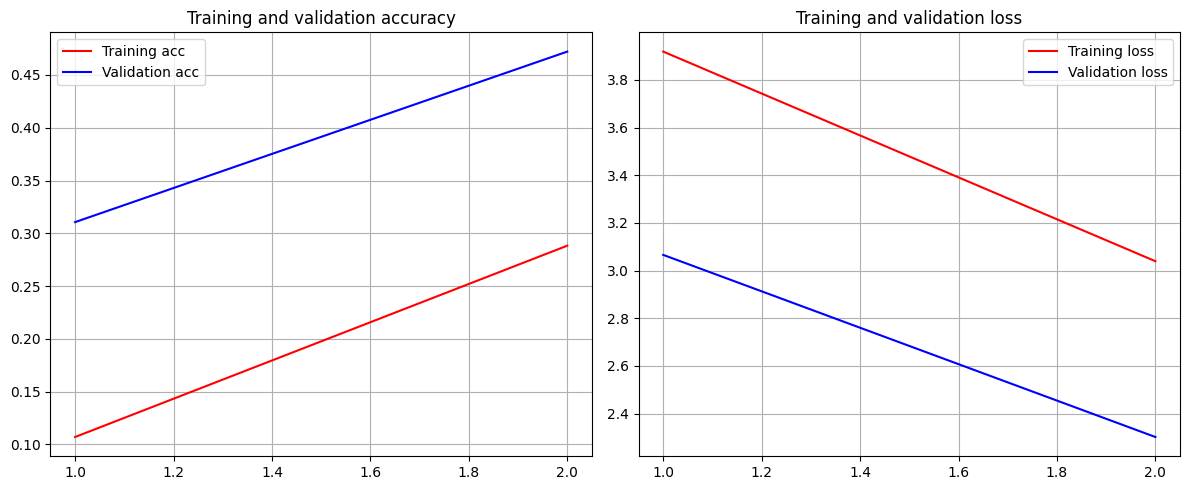

In [70]:
visualize(fine_tune_inception1_1)